In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Las compuertas logicas son relaciones entre dos variables que arrojan un resultado unico
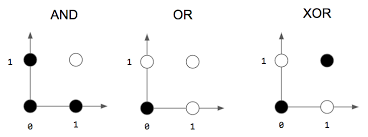

### El perceptron es capaz de resolver las logicas AND and OR, en este caso estudiaremos la logica AND
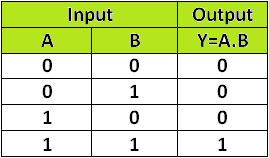

#### Primeramente Generamos los datos de entrenamiento, es decir la relacion logica AND, los dos primeros son los datos de entrada y el ultimo es la salida deseada (bias,x1,x2)

In [6]:
data = np.array([[1,0, 0,0], [1,0, 1,0], [1,1,0,0], [1,1,1,1]], np.float32)  # AND
# data = np.array([[1,0, 0,0], [1,0, 1,1], [1,1,0,1], [1,1,1,0]], np.float32)    # XOR

#### Graficamos los datos para visualizar nuestra muestra de entrenamiento

Text(0, 0.5, 'X2')

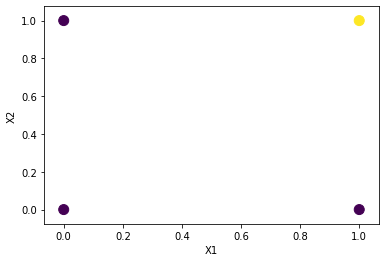

In [7]:
plt.scatter(data[: ,1], data[: ,2], c=data[: ,3], s=100, cmap='viridis')
plt.xlabel("X1")
plt.ylabel("X2")

Usamos el perceptron para que aprenda dicha logica
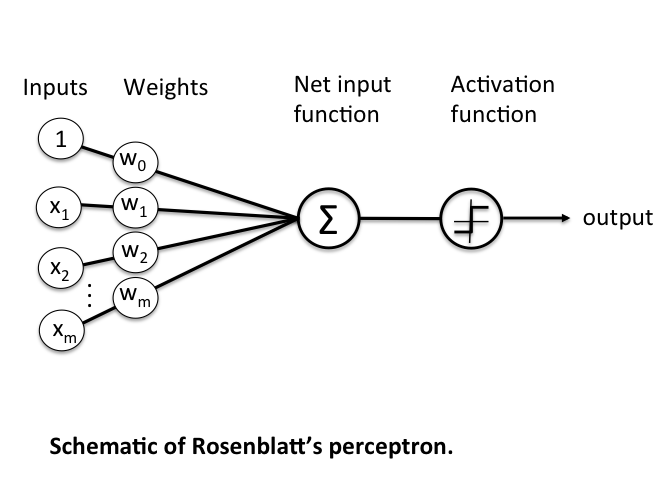

### Definimos una funcion perceptron que toma como argumento los datos de entrada (bias,x1,x2) y los pesos (w0,w1,w2)

In [8]:
def activate(inputs, weights):
    activation=0.0
    for i,w in zip(inputs,weights):
        activation += i*w 
    return 1.0 if activation>=0.0 else 0.0

### Se define funcion para graficar los datos y linea recta obtenida por el perceptron 

In [9]:
def line(d,w):
    plt.scatter(d[:, 1], d[:, 2], c=d[:,3], s=100, cmap='viridis')
    plot_x = np.array([np.min(d[:, 1] - 0.2), np.max(d[:, 2]+0.2)])
    plot_y =  -1 / w[2] * (w[1] * plot_x + w[0])
    plot_y = np.reshape(plot_y, [2, -1])
    plot_y = np.squeeze(plot_y)
    plt.plot(plot_x, plot_y, color='k', linewidth=2)
    plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
    plt.text(0.425, 1.05, 'AND logic', fontsize=14)
    plt.xticks([0.0, 0.5, 1.0]); plt.yticks([0.0, 0.5, 1.0])
    plt.show()

### A continuacion se define la funcion de aprendizaje donde se actualizan los pesos (w0,w1,w2) en base a las reglas de aprendizaje del perceptron

In [10]:
def training(dataset,l_rate,n_epoch):
    weights = [np.random.uniform(0, 1) for i in range(len(dataset[0]))]  # pesos inicializados aleatoriamente
    
    err = np.array([])
    itera = np.array([])

    for epoch in range(n_epoch):  # numero de iteraciones sobre los datos de entrada
        sum_error = 0.0
        for i in range(len(dataset)):  # iteraciones sobre los datos
            prediction =  activate(dataset[i][:-1],weights)
            error = dataset[i][-1] - prediction
            print("error row ",error)
            sum_error += error**2
            for j in range(len(weights)):    # Actualizacion de los pesos 
                weights[j] = weights[j]+(l_rate*error*dataset[i][j])
                
        print("Iteration # ",epoch," Error = ",sum_error," W[0] ",weights[0], "W[1] ",weights[1], "W[2] ",weights[2])
        print("==================================================")
                           
        line(data,weights)
 
        err = np.append(err,sum_error)
        itera = np.append(itera,epoch)
        
        # si el error total en la muestra es igual a 0 sale del loop de iteraciones 
        if(sum_error == 0.0): 
            print("errores ",err, "iteraciones ",itera)
            plt.plot(itera,err,'o-')
            plt.xlabel("Epoch")
            plt.ylabel("SSE")
            break

    return weights

error row  -1.0
error row  -1.0
error row  -1.0
error row  0.0
Iteration #  0  Error =  3.0  W[0]  0.16460088765573053 W[1]  -0.04679327976590644 W[2]  0.07748255627841613


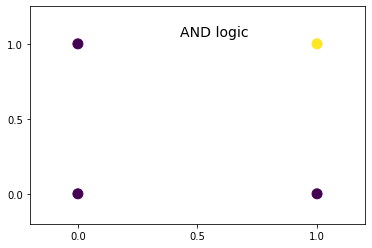

error row  -1.0
error row  -1.0
error row  0.0
error row  1.0
Iteration #  1  Error =  3.0  W[0]  0.06460088765573052 W[1]  0.05320672023409356 W[2]  0.07748255627841613


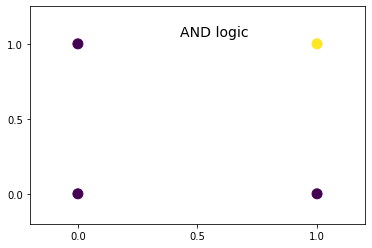

error row  -1.0
error row  -1.0
error row  0.0
error row  1.0
Iteration #  2  Error =  3.0  W[0]  -0.035399112344269484 W[1]  0.15320672023409357 W[2]  0.07748255627841613


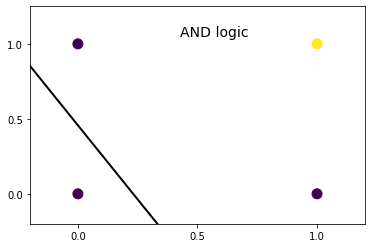

error row  0.0
error row  -1.0
error row  -1.0
error row  1.0
Iteration #  3  Error =  3.0  W[0]  -0.1353991123442695 W[1]  0.15320672023409357 W[2]  0.07748255627841613


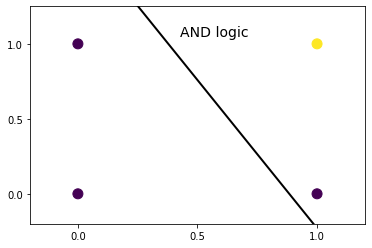

error row  0.0
error row  0.0
error row  -1.0
error row  1.0
Iteration #  4  Error =  2.0  W[0]  -0.1353991123442695 W[1]  0.15320672023409357 W[2]  0.17748255627841614


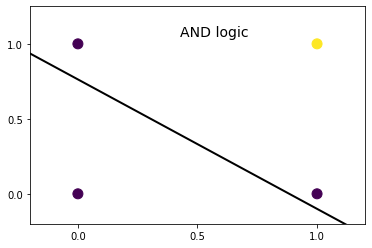

error row  0.0
error row  -1.0
error row  0.0
error row  1.0
Iteration #  5  Error =  2.0  W[0]  -0.1353991123442695 W[1]  0.2532067202340936 W[2]  0.17748255627841614


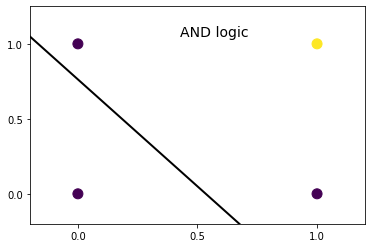

error row  0.0
error row  -1.0
error row  -1.0
error row  1.0
Iteration #  6  Error =  3.0  W[0]  -0.2353991123442695 W[1]  0.2532067202340936 W[2]  0.17748255627841614


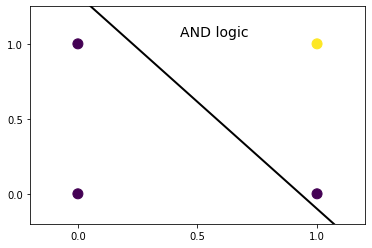

error row  0.0
error row  0.0
error row  -1.0
error row  1.0
Iteration #  7  Error =  2.0  W[0]  -0.2353991123442695 W[1]  0.2532067202340936 W[2]  0.2774825562784161


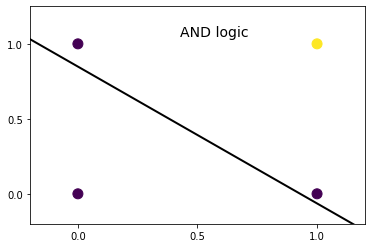

error row  0.0
error row  -1.0
error row  0.0
error row  0.0
Iteration #  8  Error =  1.0  W[0]  -0.3353991123442695 W[1]  0.2532067202340936 W[2]  0.1774825562784161


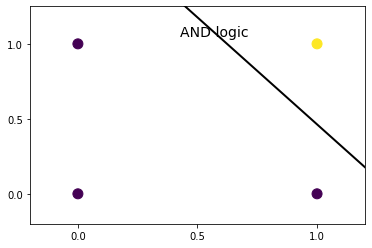

error row  0.0
error row  0.0
error row  0.0
error row  0.0
Iteration #  9  Error =  0.0  W[0]  -0.3353991123442695 W[1]  0.2532067202340936 W[2]  0.1774825562784161


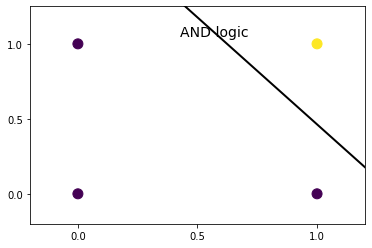

errores  [3. 3. 3. 3. 2. 2. 3. 2. 1. 0.] iteraciones  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


[-0.3353991123442695,
 0.2532067202340936,
 0.1774825562784161,
 1.6218851819874696]

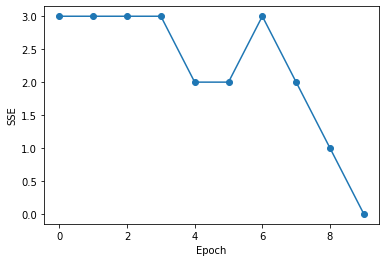

In [11]:
training(data,0.1,20)